<a href="https://colab.research.google.com/github/raqueeb/TensorFlow2/blob/master/deep_learning_decision_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ডিপ লার্নিং দিয়ে ডিসিশন বাউন্ডারি, চাঁদ আকারের ডাটাসেট

যেকোনো প্রজেক্ট এর কাজের শুরুতে আমার একটা অভ্যাস হচ্ছে সেই ডাটাসেটকে প্লট করে দেখা। একটা ডাটাসেটের ঠিকমতো প্লটিং দেখতে পারলে তার সমস্যার অনেকটাইকুল কিনারা করা যায়। এজন্যই ডাটা ভিজুয়ালাইজেশন এতটাই দরকারি। আমরা যখন সাইকিট-লার্ন নিয়ে কাজ করছিলাম তখন এধরনের ডাটার অনেক প্লটিং দেখেছিলাম। 

<img src="https://raw.githubusercontent.com/raqueeb/deep_learning_book/master/assets/generator.png"> চিত্রঃ বিভিন্ন ধরনের ডেটার প্লটিং 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

## অল্প এবং বেশি গভীর ডিপ নিউরাল নেটওয়ার্কের কিছু কাজ

ডাক্তার প্লটিং এর পাশাপাশি প্রয়োজনে দরকারি ডাটাসেট না পেলে অনেক ধরনের ডাটাসেট স্যাম্পল জেনারেট করতে হয় যা আসলে আমাদের দরকারি সাইজ এবং কম্প্লেক্সিটি বুঝেই করতে হয়। এই ধরনের জেনারেটর আমাদের ফিচার এবং তার করেসপন্ডিং ‘ডিসক্রিট’ টার্গেটের একটা ম্যাট্রিক্স তৈরি করে দেয়। পাশাপাশি কিছু নয়েজও ঢোকাতে হয় রিয়ালিস্টিক করার জন্য। লিনিয়ার ডাটাসেটের পাশাপাশি কিছু নন-লিনিয়ার ডাটা নিয়ে কাজ করতে গেলে আলাদা জেনারেটর ব্যবহার করি আমরা। যেমন, দুইটা বৃত্তাংশ একটা আরেকটার মধ্যে ঢুকে গেছে। দুটা অর্ধেক চাঁদ। সাইকিট-লার্নে এটার একটা ফাংশন আছে, দেখুন এই উদাহরণে।

আমাদের কাজ হবে এই ধরনের একটা নন-লিনিয়ার ডাটাসেটে কিভাবে ডিপ লার্নিং দিয়ে সুন্দর ক্লাসিফিকেশন করা যায়। এর আগেও করেছি, তবে এই ডেটা জেনারেটর দিয়ে তৈরি, এবং আরো কমপ্লেক্স। একে sklearn.datasets থেকে ইমপোর্ট করছি এই নতুন ফাংশন দিয়ে। ফিচার এবং টার্গেট ভ্যারিয়েবল হিসেবে দুটো আলাদা আলাদা স্যাম্পল জেনারেট করছি। এরপর প্লটিং। 


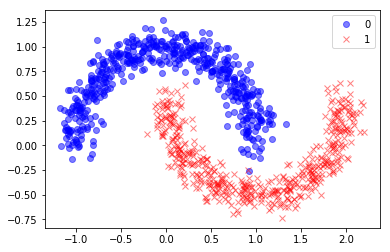

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

স্যাম্পল এর সংখ্যা দেখি।

In [3]:
X.shape

(1000, 2)

টেস্ট এবং ট্রেনিং ডাটা স্প্লিট করি।

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
try:
  # %tensorflow_version only exists in Colab.
  # শুধুমাত্র জুপিটার নোটবুক/কোলাবে চেষ্টা করবো টেন্সর-ফ্লো ২.০ এর জন্য
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

### অগভীর একটা নিউরাল নেটওয়ার্ক 

এরপর আমরা এর ইনপুটকে এক লাইনের/লেয়ারের নিউরাল নেটওয়ার্কের দিয়ে দেই। কি ঘটছে?

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(tf.keras.optimizers.Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=200, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


মডেলকে ইভালুয়েট করে দেখি অ্যাক্যুরেসি কত এসেছে। লস এবং অ্যাক্যুরেসি দেখতে পাচ্ছি এখানে।

In [10]:
results = model.evaluate(X_test, y_test)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
results

[0.31679999371369677, 0.83666664]

ডাটা প্লটিং এর পাশাপাশি আমরা ডিসিশন বাউন্ডারি দেখার চেষ্টা করি। এখানে ব্যবহার করেছি mlxtend.plotting এর মতো হেল্পার লাইব্রেরি। এর plot_decision_regions কাজ হচ্ছে মডেল থেকে যা ইনপুট দেয় সেটা সে প্লট করে দেয়। যেমন এখানে 
ডিসিশন বাউন্ডারি করে দিয়েছে ঠিকই তবে সেটা কাজ করছেনা। সত্যিই তো, এখানকার ডিসিশন বাউন্ডারি লিনিয়ার, কিন্তু ডাটা তো নন-লিনিয়ার। 

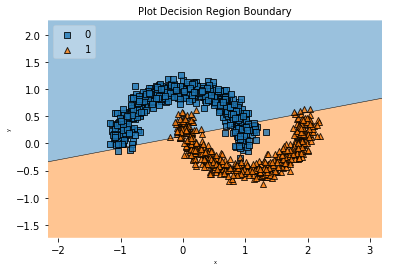

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()

### গভীর একটা নিউরাল নেটওয়ার্ক 

আমরা একটু তিন লাইনের একটা ডিপ লার্নিং মডেল থেকে আউটকাম দেখার চেষ্টা করি। ৩ লেয়ার, পাশাপাশি নিউরনের সংখ্যাও বেশি। কি ঘটছে এখন?

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='tanh'))
model.add(tf.keras.layers.Dense(2, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(tf.keras.optimizers.Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
model.evaluate(X_test, y_test)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0009398714792526637, 1.0]

In [0]:
from sklearn.metrics import accuracy_score

দেখতে পাচ্ছি অ্যাকুরেসি বেড়েছে। 

In [19]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


### নতুন ডিসিশন বাউন্ডারি
নতুন করে ডিসিশন বাউন্ডারি প্লটিং করে দেখি। অসাধারণ কাজ হয়েছে। 

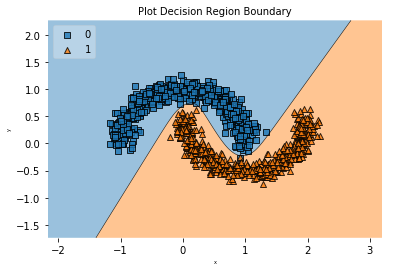

In [20]:
plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Plot Decision Region Boundary', size=10)
plt.show()